## Exercise 35

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
data=pd.read_csv("Shill_Bidding_Dataset.csv")

data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [2]:
# Drop irrelevant columns
data.drop(["Record_ID","Auction_ID","Bidder_ID"],axis=1,inplace=True)

In [3]:
data.dtypes

Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

In [4]:
data.isnull().sum()   ### Check for missing values

Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [5]:
target = 'Class'
X = data.drop(target,axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=123, stratify=y)

In [6]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [7]:
clf_svm

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
clf_svm.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
clf_svm.score(X_test, y_test)

0.9775387535590003

## Exercise 36

In [10]:
import graphviz 
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [11]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

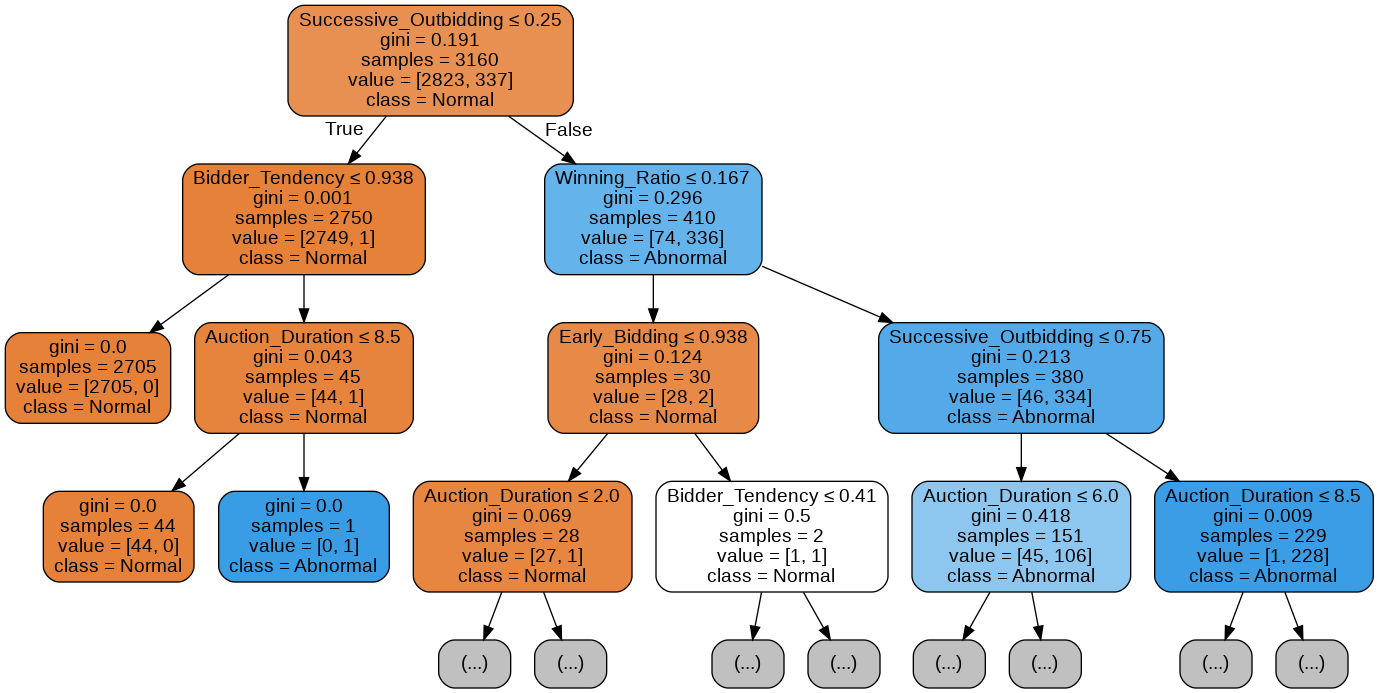

In [12]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Normal','Abnormal'],max_depth = 3,
                special_characters=True,feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
clf_tree.score(X_test, y_test)

0.9987345776652958

## Exercise 37

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [16]:
clf_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
clf_random.score(X_test, y_test)

0.9895602657386903